# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from dqn_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
from unityagents import UnityEnvironment
import numpy as np

# Load the environment
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64", no_graphics=True)

# get the environment default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# size of the state perceived by the brain
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)
print("State size: {}".format(state_size))

# size of the possible actions the brain can perform
action_size = brain.vector_action_space_size
print("Action space: {}".format(action_size))




INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


State size: 37
Action space: 4


In [12]:
# Instantiating the agent that will control the default brain
agent = Agent(state_size=state_size, action_size=action_size, seed=0 )

In [13]:
# Train the agent

def dqn(n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
    Params
    ======
        n_episodes (int):      maximum number of training episodes
        max_t (int):           maximum number of timesteps
        eps_start (float):     initial value of epsilon, use to selected the greedy action
        eps_end (float):       minimum value of epsilon
        eps_decay (float):     factor to decay epsilon by multiplication
    
    """
    # Define the monitoring metrics
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    for i_episodes in range(1, n_episodes +1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # get the current state and reset episod score to 0
        state = env_info.vector_observations[0]
        score = 0
        # execute the time steps up to max_t
        for step in range(max_t):
            # determine what action to take based on the state, epsilon
            # using the local network in evaluation mode to not avoid
            # doing an operation that will modify the weights.
            # It returns the greedy-action based on the epsilon calculation
            action = agent.act(state, eps)
            # execute the selected action, which produces an object with
            # the environment state variables
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            # Based on the observation make the agent learn
            agent.step(state, action, reward, next_state,done)
            # update the state to reflex you are in the next_state
            state = next_state
            score += reward
            # check if reached a terminal state
            if done:
                break
        # store the episode score in the queue to collect a
        # history of the last 100 episodes score
        scores_window.append(score)
        # save the score in a list 
        scores.append(score)
        # time to decay epsilon selecting the greater of two
        # value our smaller limit or the decayed eps
        eps = max(eps_end, eps_decay*eps)
        # print the average of the last 100 episodes.
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episodes,
        #                                                   np.mean(scores_window)),
        #     end="")
        # every 100 episodes print the ALL TIME score using all the episodes
        # scores from episode one until now
        if i_episodes % 100 == 0:
            print('Episode {}\tAverage Score so far: {:.2f}'.format(i_episodes,
                                                              np.mean(scores)))
        # check if the RL problem got solve by checking if the average 
        # of the last 100 episodes is greater than 22 
        if np.mean(scores_window) >= 22.0:
            import torch
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episodes-100,
                                                                                        np.mean(scores_window)))
            # saved the DL weights and architecture that solve the problem
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        
    # return all the scores of all the episodes
    return scores
            


In [14]:
# Run the training

scores = dqn()



Episode 100	Average Score so far: 0.28
Episode 200	Average Score so far: 0.74
Episode 300	Average Score so far: 0.97
Episode 400	Average Score so far: 1.30
Episode 500	Average Score so far: 1.77
Episode 600	Average Score so far: 2.48
Episode 700	Average Score so far: 3.35
Episode 800	Average Score so far: 3.84
Episode 900	Average Score so far: 4.32
Episode 1000	Average Score so far: 5.04
Episode 1100	Average Score so far: 5.48
Episode 1200	Average Score so far: 5.79
Episode 1300	Average Score so far: 6.00
Episode 1400	Average Score so far: 6.36
Episode 1500	Average Score so far: 6.74
Episode 1600	Average Score so far: 6.95
Episode 1700	Average Score so far: 7.04
Episode 1800	Average Score so far: 7.20
Episode 1900	Average Score so far: 7.35
Episode 2000	Average Score so far: 7.59
Episode 2100	Average Score so far: 7.85
Episode 2200	Average Score so far: 8.01
Episode 2300	Average Score so far: 7.98
Episode 2400	Average Score so far: 8.04
Episode 2500	Average Score so far: 8.16
Episode 2

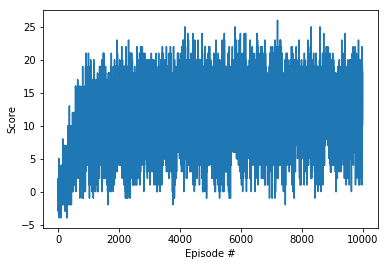

In [15]:
# saved the DL weights and architecture that solve the problem
import torch
torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()





In [16]:
# close environment
env.close()